## 예제 
1. drinks.csv 파일 로드
2. 결측치 확인
3. 데이터프레임의 정보 출력
4. continent 칼럼에서 결측치 존채 -> 결측치 'OT'로 대체
5. continent 별 spirit_servings 칼럼의 평균,최소 ,최대, 합계를 출력
6. total_litres_of_pure_alcohol 칼럼의 평균보다 높은 continent가 어디인지 출력
7. 국가별 술 소비량 대비 알콜의 비율 컬럼을 추가

In [25]:
import pandas as pd

In [26]:
drinks=pd.read_csv("../csv/drinks.csv")
drinks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       193 non-null    object 
 1   beer_servings                 193 non-null    int64  
 2   spirit_servings               193 non-null    int64  
 3   wine_servings                 193 non-null    int64  
 4   total_litres_of_pure_alcohol  193 non-null    float64
 5   continent                     170 non-null    object 
dtypes: float64(1), int64(3), object(2)
memory usage: 9.2+ KB


In [27]:
# 결측치의 개수를 확인하는 코드
drinks.isna().sum()



country                          0
beer_servings                    0
spirit_servings                  0
wine_servings                    0
total_litres_of_pure_alcohol     0
continent                       23
dtype: int64

In [28]:
# 결측치를 'OT'로 대체
# 결측치를 대체하는 함수 ->fillna('OT')
# drinks.loc[결측치인 조건,'continet'] = 'OT'

drinks['continent']=drinks['continent'].fillna("OT")       #.value_counts()
# drinks.loc[drinks['continent'].isna(), 'continent']= 'OT'



In [29]:
# continent별  spirit_servings컬럼의 평균,최소,최대,합계를 출력
# drinks[['continet','spirit_servings']].gorupyby('continent'   ).agg(['mean','max','min','sum'])

# pd.pivot_table(
#     drinks,
#     index="continent",
#     values="spirit_servings",
#     aggfunc=['mean','max','min','sum']
# )

group_data=drinks.groupby(['continent']).agg(['mean','min','max','sum'])


C:\Users\dgh06\AppData\Local\Temp\ipykernel_1772\2188668992.py:11: FutureWarning: ['country'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  group_data=drinks.groupby(['continent']).agg(['mean','min','max','sum'])


In [30]:
import matplotlib.pyplot as plt

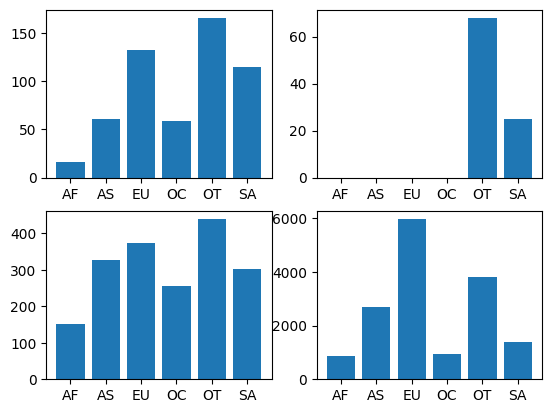

In [31]:
# 바형 그래프
# 한 화면에 4개 그래프
# bar() x와 y의 값이 필수 항목

x=group_data.index
# group_data["spirit_servings"]['mean']

# subplot(행의 수, 열의 수 , 영역 지정)
plt.subplot(2,2,1)
plt.bar(x,group_data["spirit_servings"]['mean'])
plt.subplot(2,2,2)
plt.bar(x,group_data["spirit_servings"]['min'])
plt.subplot(2,2,3)
plt.bar(x,group_data["spirit_servings"]['max'])
plt.subplot(2,2,4)
plt.bar(x,group_data["spirit_servings"]['sum'])

plt.show()


In [32]:
# NNN=drinks2["total_litres_of_pure_alcohol"]["mean"].mean()

# drinks3=drinks2.iloc[:,[-4]] > NNN
# drinks3.loc[drinks3["total_litres_of_pure_alcohol"]['mean']].index



#### 교수님 풀이

In [33]:
# 전체 알콜의 소비량의 평균보다 높은 대륙은 어디인가?

# 전체 알콜의 소비량의 평균
Total_mean = drinks["total_litres_of_pure_alcohol"].mean()

In [34]:
group_data2=drinks[['continent',"total_litres_of_pure_alcohol"]].groupby('continent').mean()
#group_data2 컬럼 하나므로 series형태로 바꾼다
group_data2=drinks[['continent',"total_litres_of_pure_alcohol"]].groupby('continent').mean()["total_litres_of_pure_alcohol"]

In [35]:
group_data2[group_data2>Total_mean]

continent
EU    8.617778
OT    5.995652
SA    6.308333
Name: total_litres_of_pure_alcohol, dtype: float64

In [36]:
# 7.국가별 술 소비량 대비 알콜 비율 컬럼을 추가


# 국가별 술 소비량 파생변수 생성
drinks["total_servings"]=drinks['beer_servings'] + drinks["spirit_servings"] +drinks["wine_servings"]

In [37]:
drinks.head(2)

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent,total_servings
0,Afghanistan,0,0,0,0.0,AS,0
1,Albania,89,132,54,4.9,EU,275


In [38]:
# 술 소비량 대비 알콜 비율이라는 파생 변수 생성
# (알콜 소비량 / 술 소비량) *100
# 결측치가 나온다면 0으로 대체해준다
drinks["alcohol_rate"]=(drinks["total_litres_of_pure_alcohol"]/ drinks["total_servings"] * 100).fillna(0)


In [46]:
# drinks=pd.read_csv("../csv/drinks.csv")
# drinks.isna().sum()
# drinks['continent']=drinks['continent'].fillna("OT")  

# group_data=drinks.groupby(['continent']).agg(['mean','min','max','sum'])

# Total_mean = drinks["total_litres_of_pure_alcohol"].mean()

# group_data2=drinks[['continent',"total_litres_of_pure_alcohol"]].groupby('continent').mean()
# #group_data2 컬럼 하나므로 series형태로 바꾼다
# group_data2=drinks[['continent',"total_litres_of_pure_alcohol"]].groupby('continent').mean()["total_litres_of_pure_alcohol"]

# group_data2[group_data2>Total_mean]

# drinks["total_servings"]=drinks['beer_servings'] + drinks["spirit_servings"] +drinks["wine_servings"]
# drinks["alcohol_rate"]=(drinks["total_litres_of_pure_alcohol"]/ drinks["total_servings"] * 100).fillna(0)

In [39]:
# 가장 독한 술을 먹는 나라는 어디인가?
# 우리나라는 얼마나 독한 술을 마시는가?
# 북한은 얼마나 독한 술을 먹는가?

drinks_rank = drinks.sort_values('alcohol_rate',ascending= False,ignore_index=True)
drinks_rank


,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent,total_servings,alcohol_rate
0,Gambia,8,0,1,2.4,AF,9,26.666667
1,Sierra Leone,25,3,2,6.7,AF,30,22.333333
2,Nigeria,42,5,2,9.1,AF,49,18.571429
3,Uganda,45,9,0,8.3,AF,54,15.370370
4,Rwanda,43,2,0,6.8,AF,45,15.111111
...,...,...,...,...,...,...,...,...
188,Maldives,0,0,0,0.0,AS,0,0.000000
189,Libya,0,0,0,0.0,AF,0,0.000000
190,Iran,0,0,0,0.0,AS,0,0.000000
191,Kuwait,0,0,0,0.0,AS,0,0.000000


In [40]:
drinks_rank.loc[drinks_rank['country']=='South Korea']

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent,total_servings,alcohol_rate
14,South Korea,140,16,9,9.8,AS,165,5.939394


In [41]:
drinks_rank.loc[drinks_rank['country']=='North Korea']

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent,total_servings,alcohol_rate
181,North Korea,0,0,0,0.0,AS,0,0.0


Text(24, 8.939393939393941, 'South Korea: 15')

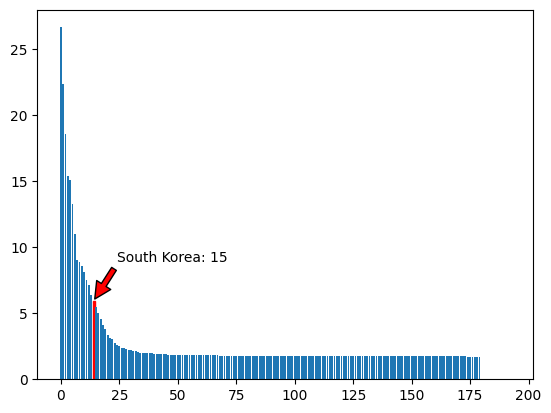

In [45]:
# 시각화
# 우리나라를 그래프에서 표기
x =list(range(len(drinks_rank)))
y = drinks_rank['alcohol_rate']

# 국가 리스트
country_list= drinks_rank['country'].tolist()   # .tolist() : 리스트 형식으로 바꾸겠다
bar_list = plt.bar(x,y)
# plt.show

korea_rank = country_list.index('South Korea')
korea_alcohol_rate =drinks_rank.loc[drinks_rank['country']== 'South Korea', 'alcohol_rate'].values[0]

# 그래프 커스텀
# South Korea의 막대의 색상을 변경
bar_list[korea_rank].set_color('r')    # .index 리스트의 인덱스값을 찾아주는 것

# 그래프에 글씨와 글씨와 화살표 추가

plt.annotate('South Korea: ' + str(korea_rank +1),
            xy=(korea_rank,korea_alcohol_rate),
            xytext = (korea_rank +10,korea_alcohol_rate +3),
            arrowprops = dict(facecolor ='r', shrink= 0.05)

            
            )

